In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest, DescrStatsW

In [34]:
df = pd.read_csv('customer_behavior.csv')
df.head()
df.info()
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       5000 non-null   int64  
 1   Gender           4903 non-null   object 
 2   Region           4825 non-null   object 
 3   PurchaseAmount   4850 non-null   float64
 4   ProductCategory  4474 non-null   object 
 5   Churn            4735 non-null   object 
 6   CampaignGroup    4815 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 273.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 3715 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       3715 non-null   int64  
 1   Gender           3715 non-null   object 
 2   Region           3715 non-null   object 
 3   PurchaseAmount   3715 non-null   float64
 4   ProductCategory  3715 non-null   o

In [35]:
# 1. What is the average, median, and mode of PurchaseAmount?
mean_purchase = df['PurchaseAmount'].mean()
median_purchase = df['PurchaseAmount'].median()
mode_purchase = df['PurchaseAmount'].mode()[0]

print("Mean:", mean_purchase)
print("Median:", median_purchase)
print("Mode:", mode_purchase)


Mean: 1001.1536716016151
Median: 996.15
Mode: 0.0


In [36]:
# 2. Are there any outliers in the PurchaseAmount data?

Q1 = df['PurchaseAmount'].quantile(0.25)
Q3 = df['PurchaseAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['PurchaseAmount'] < lower_bound) | (df['PurchaseAmount'] > upper_bound)]
print(outliers.shape)
print(outliers)
print("\nNumber of outliers:", outliers.shape[0])

(12, 7)
      CustomerID  Gender Region  PurchaseAmount ProductCategory Churn  \
195         1196    Male   West         2318.33         Fashion   Yes   
265         1266  Female   East         2496.41     Electronics   Yes   
348         1349    Male  South         2688.69     Electronics   Yes   
411         1412  Female  South         2349.16         Fashion   Yes   
826         1827    Male   East         2578.89     Electronics   Yes   
1358        2359    Male   West         2384.19     Electronics   Yes   
2285        3286    Male   East         2457.05         Grocery    No   
2557        3558    Male   East         2316.19         Fashion   Yes   
2681        3682  Female   East         2400.69         Fashion   Yes   
3326        4327  Female  North         2357.41         Grocery    No   
3438        4439  Female   East         2688.88         Grocery    No   
3564        4565    Male   East         2643.88     Electronics   Yes   

     CampaignGroup  
195              B  


Skewness: 0.09137463187452266
Kurtosis: -0.28400835886052134


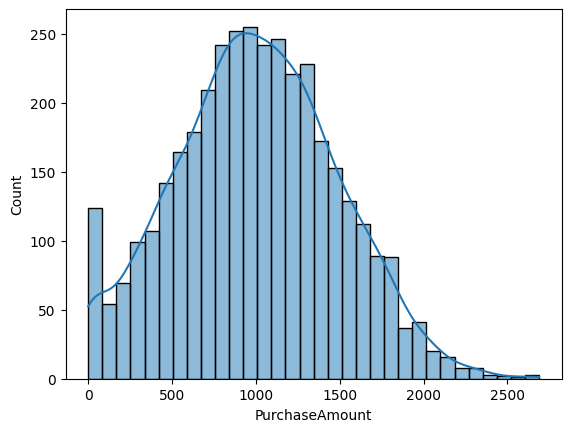

In [47]:
# 3. Is there any skewness or kurtosis in the PurchaseAmount distribution?
skewness = df['PurchaseAmount'].skew()
kurtosis = df['PurchaseAmount'].kurtosis()
sns.histplot(df['PurchaseAmount'],kde=True)
#plt.show()
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

In [38]:
# 4. Difference in spending between male and female
male_purchase = df[df['Gender'] == 'Male']['PurchaseAmount']
female_purchase = df[df['Gender'] == 'Female']['PurchaseAmount']

#print(male_purchase)
#print(female_purchase)

# t-test
t_stat, p_value = stats.ttest_ind(male_purchase, female_purchase, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 1.6528676752413163
P-value: 0.09844240203283679


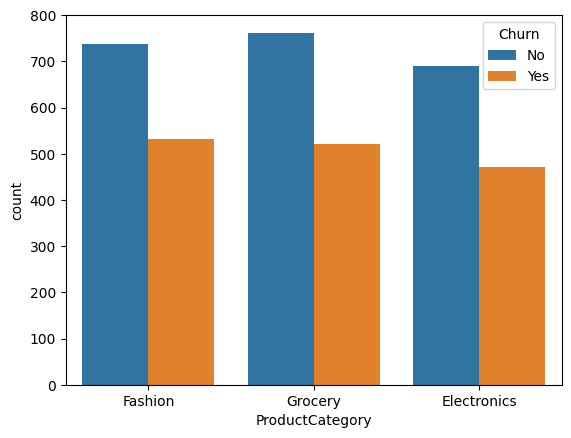

In [59]:
#5. Is there a relationship between ProductCategory and customer churn?

sns.countplot(data=df, x='ProductCategory', hue='Churn')
plt.show()

In [39]:
# 6.Does PurchaseAmount vary significantly across different regions?

regions = df['Region'].unique()
grouped = [df[df['Region'] == r]['PurchaseAmount'] for r in regions]

f_stat, p_val = stats.f_oneway(*grouped)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

ANOVA F-statistic: 0.6549765620050508
P-value: 0.5797709640286925


In [43]:
# 7. Which email campaign (A or B) performed better in terms of average PurchaseAmount?

print(df['CampaignGroup'].unique())
df.info()
campaign_mean = df.groupby('CampaignGroup')['PurchaseAmount'].mean()
print("\nAverage PurchaseAmount by Campaign:")
print(campaign_mean)

['A' 'B']
<class 'pandas.core.frame.DataFrame'>
Index: 3715 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       3715 non-null   int64  
 1   Gender           3715 non-null   object 
 2   Region           3715 non-null   object 
 3   PurchaseAmount   3715 non-null   float64
 4   ProductCategory  3715 non-null   object 
 5   Churn            3715 non-null   object 
 6   CampaignGroup    3715 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 232.2+ KB

Average PurchaseAmount by Campaign:
CampaignGroup
A    1010.275083
B     992.017516
Name: PurchaseAmount, dtype: float64


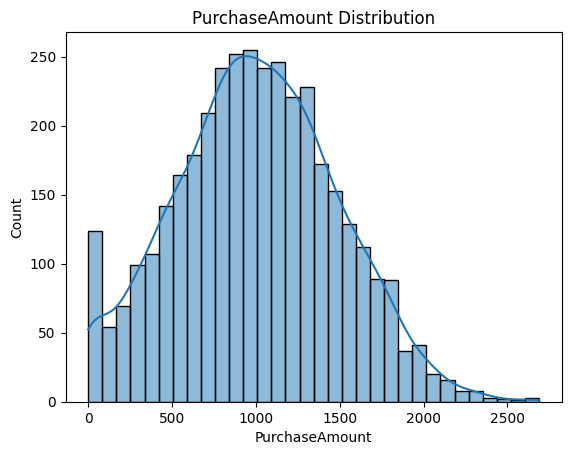

In [57]:
# 8. Can we assume PurchaseAmount follows a normal distribution?

sns.histplot(df['PurchaseAmount'], kde=True)
plt.title("PurchaseAmount Distribution")
plt.show()




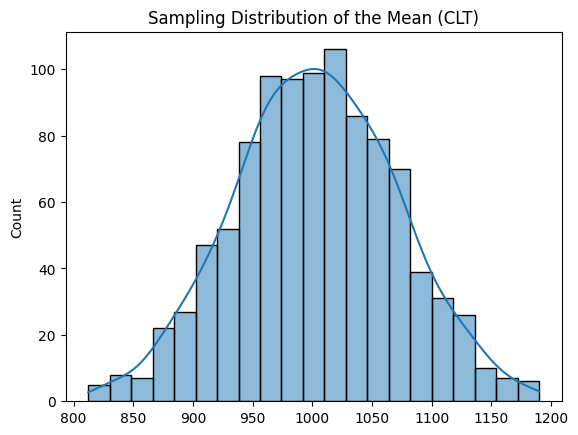

In [44]:
# 9.What insights can we gain by applying the Central Limit Theorem?
sample_means = []
for _ in range(1000):
    sample = df['PurchaseAmount'].sample(50, replace=True)
    sample_means.append(sample.mean())

sns.histplot(sample_means, kde=True)
plt.title("Sampling Distribution of the Mean (CLT)")
plt.show()

In [58]:
#10. What is the 95% confidence interval for the average PurchaseAmount?

mean = df['PurchaseAmount'].mean()
std = df['PurchaseAmount'].std()
n = len(df)

# Standard error
se = std / np.sqrt(n)

# 95% CI using z-score
ci_low = mean - 1.96 * se
ci_high = mean + 1.96 * se

print("95% CI:", (ci_low, ci_high))

95% CI: (np.float64(985.6028415158917), np.float64(1016.7045016873385))
